<a href="https://colab.research.google.com/github/arneetsandhu/handwritten_digit_recognition/blob/main/handwrittendigit_regognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train ,y_train) ,(x_test ,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape ,x_test.shape ,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


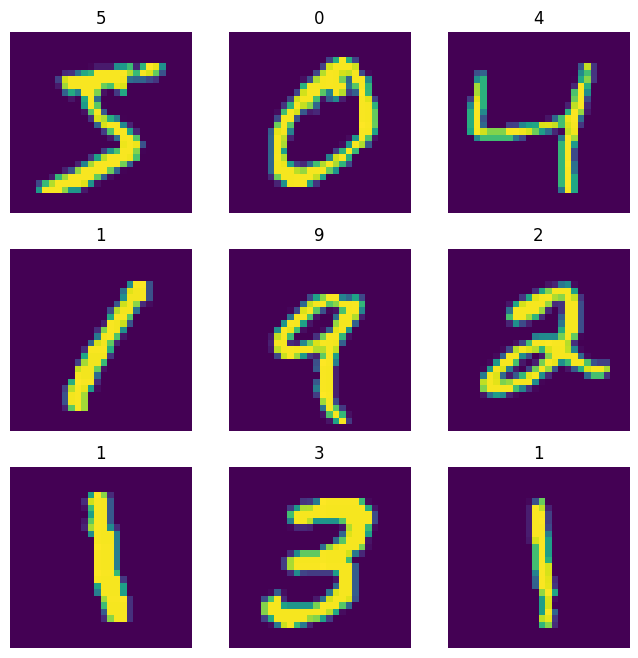

In [ ]:
plt.figure(figsize =(8,8))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
#Normalization
x_train =tf.keras.utils.normalize(x_train, axis =0)
x_test =tf.keras.utils.normalize(x_test, axis =0)

**Model** **building**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128 ,activation ='relu'))
model.add(tf.keras.layers.Dense(64 ,activation ='relu'))
model.add(tf.keras.layers.Dense(32 ,activation ='relu'))
model.add(tf.keras.layers.Dense(10 ,activation ='softmax')) # output






In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model complilation
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True), metrics =['accuracy'])

In [ ]:
model.fit(x_train ,y_train , validation_data =(x_test , y_test ) , batch_size=32 ,epochs =15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 4ms/step - loss: 0.6480 - accuracy: 0.7955 - val_loss: 0.4400 - val_accuracy: 0.8969
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2793 - accuracy: 0.9179 - val_loss: 0.3070 - val_accuracy: 0.9286
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1882 - accuracy: 0.9444 - val_loss: 0.2474 - val_accuracy: 0.9452
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1443 - accuracy: 0.9574 - val_loss: 0.1913 - val_accuracy: 0.9564
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1177 - accuracy: 0.9647 - val_loss: 0.1886 - val_accuracy: 0.9600
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.1907 - val_accuracy: 0.9586
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0842 - accuracy: 0.9738 - val_loss: 0.2052 - val_accuracy: 0.9571


In [ ]:
import cv2

In [ ]:
image = cv2.imread('image.4.png') [ :,:,0]
image = np.invert(np.array([image]))


1/1 [==============================] - 0s 24ms/step
4


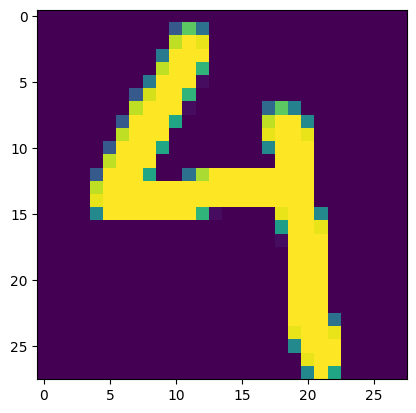

In [ ]:
output =model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [ ]:
image = cv2.imread('image.8.png') [ :,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 22ms/step
3


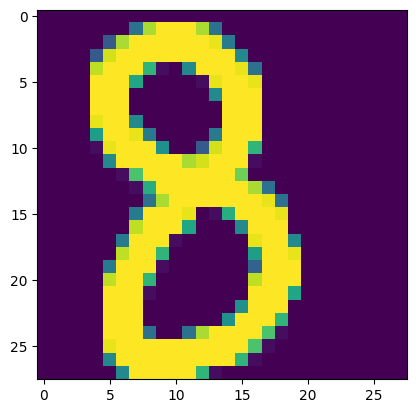

In [ ]:
output =model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [ ]:
image = cv2.imread('image.6.png') [ :,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 22ms/step
2


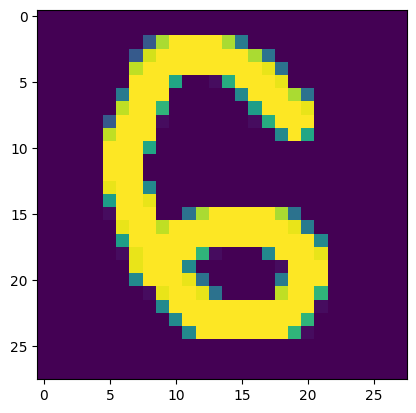

In [ ]:
output =model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

**Model** **saving**

In [ ]:
model.save('/content/handwritten_digit_recognition_model.keras')